### Linear Regression

🔸 Linear regression predicts a real value output based on the input value. 
* Simple linear regression only has one input/variable and we try to fit a line to best describe the output and input relationship
* Multiple linear regression has multiple variables as input and we try to fit a hyperplane instead.

🔸 A example of simple linear regression is salary prediction, with the salary as output, and years of working experience as input variable.

🔸 The algorithm can be used for simple linear regression or multiple linear regression, and in this notebook, it will be implemented for simple linear regression using [sklearn linear regression algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.)


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Read data

In [2]:
df = pd.read_csv('Salary_Data.csv')
# shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
df.head()

,YearsExperience,Salary
0,9.6,112635.0
1,4.9,67938.0
2,8.2,113812.0
3,5.3,83088.0
4,3.2,64445.0


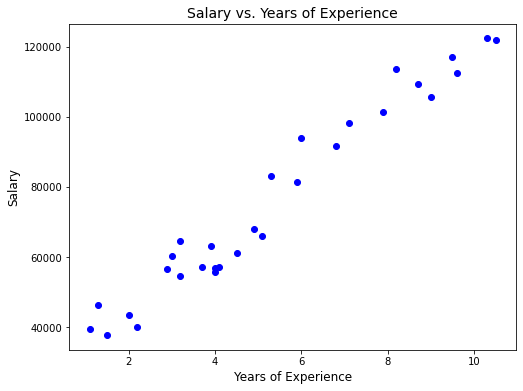

In [4]:
# visualize data
fig = plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c='b')
plt.title('Salary vs. Years of Experience', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

### Split data to train and test dataset

In [5]:
x = np.array(df.iloc[:,0:1])
y = np.array(df.iloc[:,1])

In [6]:
train_frac = 0.7
train_size = int(df.shape[0] * train_frac)
x_train = x[0:train_size,:]
y_train = y[0:train_size]
x_test = x[train_size:,:]
y_test = y[train_size:]

In [7]:
print ('training size is {}\ntest size is {}'.format(x_train.shape[0], x_test.shape[0]))

training size is 21
test size is 9


### Initialize the model

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)
train_accuracy = lr.score(x_train, y_train)*100

### Predict the test data output

In [9]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
coef = lr.coef_
intercept = lr.intercept_
test_accuracy = lr.score(x_test, y_test)*100

In [10]:
# print the test data, predicted test data and the error
np.set_printoptions(formatter={'float': lambda x: "{0:0.01f}".format(x)})
print('y_test\n {}\n\ny_pred_test\n {}\n\ntest accuracy (%) {}\n\ncoef {} intercept {}'
      .format(y_test, y_pred_test, test_accuracy, coef, intercept))

y_test
 [116969.0 81363.0 121872.0 91738.0 54445.0 63218.0 61111.0 93940.0 60150.0]

y_pred_test
 [115224.5 81135.1 124693.7 89657.4 55568.1 62196.6 67878.1 82082.0 53674.2]

test accuracy (%) 95.1483199421986

coef [9469.3] intercept 25266.40502593999


### Visulize fitted results

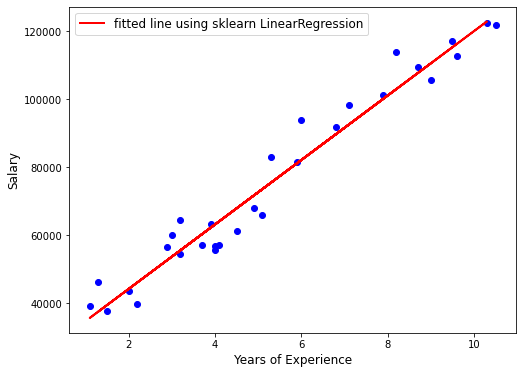

In [11]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c='b')
plt.plot(x_train, y_pred_train, c='r', lw=2)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(['fitted line using sklearn LinearRegression'], fontsize=12)
plt.show()